## YOLOv3 Clothing item detection

In [75]:
! ls

extraction_bb.py   output      rename.py	 yolo
extract_top.py	   predictors  requirements.txt  YOLOv3.ipynb
new_image_demo.py  README.md   tests


In [76]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [78]:
%cd Clothing_Detection_YOLO

[Errno 2] No such file or directory: 'Clothing_Detection_YOLO'
/Clothing_Detection_YOLO


In [79]:
! git pull

Already up to date.


In [80]:
%cd yolo/weights

/Clothing_Detection_YOLO/yolo/weights


In [81]:
!gdown --id 1BaWJ6j5HGC136h6f4kl_eo2LNPfjgyjq

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BaWJ6j5HGC136h6f4kl_eo2LNPfjgyjq
To: /Clothing_Detection_YOLO/yolo/weights/yolov3-modanet_last.weights
100% 247M/247M [00:00<00:00, 272MB/s]


In [82]:
%cd ..

/Clothing_Detection_YOLO/yolo


In [83]:
%cd ..

/Clothing_Detection_YOLO


In [84]:
! ls

extraction_bb.py   output      rename.py	 yolo
extract_top.py	   predictors  requirements.txt  YOLOv3.ipynb
new_image_demo.py  README.md   tests


In [85]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [86]:
import sys
sys.path.append('/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/modanetcfg')

In [87]:
sys.path.append('/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/modanetcfg/yolov3-modanet.cfg')

In [88]:
sys.path.append('/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/modanetcfg/modanet.names')

In [89]:
sys.path.append('/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/weights/yolov3-modanet_last.weights')

In [90]:
sys.path.append('/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/predictors/YOLOv3.py')

## Detect, Crop and Save items category-wise

In [91]:
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from yolo.utils.utils import *
from predictors.YOLOv3 import YOLOv3Predictor

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
print(device)

#YOLO PARAMS
yolo_modanet_params = {   "model_def" : "/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/modanetcfg/yolov3-modanet.cfg",
"weights_path" : "/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/weights/yolov3-modanet_last.weights",
"class_path":"/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/modanetcfg/modanet.names",
"conf_thres" : 0.5,
"nms_thres" :0.4,
"img_size" : 416,
"device" : device}
#DATASET
dataset = 'modanet' 
yolo_params = yolo_modanet_params

#Classes
def load_classes(path):
    fp = open(path, "r")
    names = fp.read().split("\n")
    return names
classes = load_classes(yolo_params["class_path"])

#Colors
cmap = plt.get_cmap("rainbow")
colors = np.array([cmap(i) for i in np.linspace(0, 1, 13)])
#np.random.shuffle(colors)
model = 'yolo' 
detectron = YOLOv3Predictor(params=yolo_params)
#folder = "/content/MyDrive/MyDrive/multicategory/models" #input('input image directory')
folder = "/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/tests" #input('input image directory')
parent_dir = '/content/output'
images=[]
detections = []

    #path = input('img path: ')
    #if not os.path.exists(path):
    #    print('Img does not exists..')
    #    break#continue
for filename in os.listdir(folder):
    path = os.path.join(folder,filename)
    #print(path)
    img = cv2.imread(path)
    if img is not None:
        images.append(img)
        #print('image appended')
    detections = detectron.get_detections(img)
    #print(detections)
    #print(type(detections))
    #print(type(images))
    count = 1


    if len(detections) != 0 :
        detections.sort(reverse=False ,key = lambda x:x[4])
        img_id = path.split('/')[-1].split('.')[0]
        print(img_id)
        for x1, y1, x2, y2, cls_conf, cls_pred in detections:


                print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf))            
                color = colors[int(cls_pred)]
                
                color = tuple(c*255 for c in color)
                color = (.7*color[2],.7*color[1],.7*color[0])       
                    
                font = cv2.FONT_HERSHEY_SIMPLEX   
            
            
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                text =  "%s conf: %.3f" % (classes[int(cls_pred)] ,cls_conf)
                
                
                
                #print(img)
                #print(y1, y2, x1, x2)
                img_crop = img[y1:y2, x1:x2]
                #print(img_crop)

                if classes[int(cls_pred)] in ['boots' , 'footwear']:
                   
                    directory = 'footwear'#str(classes[int(cls_pred)])
                    shoe_dir_path = os.path.join(parent_dir, directory)
                    try: 
                        os.mkdir(shoe_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = shoe_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+str(count)+ '.png' 
                    count = count+1

                elif classes[int(cls_pred)] in ['pants', 'shorts','skirt' ]:
                    
                    directory = 'bottomwear'#str(classes[int(cls_pred)])
                    bottom_dir_path = os.path.join(parent_dir, directory)
                    try: 
                        os.mkdir(bottom_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = bottom_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+ '.png' 
                    #crop_path = "output/cropped/bottomwear/" + str(img_id) + str(classes[int(cls_pred)])+ '.jpg' 

                elif classes[int(cls_pred)] in ['top', 'outer']:
                    
                    directory = 'topwear'#str(classes[int(cls_pred)])
                    top_dir_path = os.path.join(parent_dir, directory)
                    try: 
                        os.mkdir(top_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = top_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+ '.png' 
                    #crop_path = "output/cropped/upper/" + str(img_id) + str(classes[int(cls_pred)])+ '.jpg' 
                
                else:
                    
                    directory = str(classes[int(cls_pred)])
                    new_dir_path = os.path.join(parent_dir, directory) 
                    try: 
                        os.mkdir(new_dir_path) 
                    except OSError as error: 
                        print("directory exists")
                    crop_path = new_dir_path + "/" + str(img_id) + str(classes[int(cls_pred)])+ '.png' 
                if((x1 > 0) & (x2 > 0) & (y1 > 0) & (y2 > 0)):
                    cv2.imwrite(crop_path,img_crop)
                cv2.rectangle(img.copy(),(x1,y1) , (x2,y2) , color,3)
                y1 = 0 if y1<0 else y1
                y1_rect = y1-25
                y1_text = y1-5

                if y1_rect<0:
                    y1_rect = y1+27
                    y1_text = y1+20
                    #break
                

        print('Output saved')        
        print('End inner loop')
        #break
    #print("end of if loop")
print("End of while loop")

cuda
Model loaded successfully from /content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/weights/yolov3-modanet_last.weights.
7
	+ Label: dress, Conf: 0.94772
directory exists
	+ Label: headwear, Conf: 0.95098
directory exists
	+ Label: bag, Conf: 0.99944
directory exists
Output saved
End inner loop
19
	+ Label: bag, Conf: 0.83571
directory exists
	+ Label: headwear, Conf: 0.99051
directory exists
Output saved
End inner loop
31
	+ Label: belt, Conf: 0.62496
directory exists
	+ Label: dress, Conf: 0.96573
directory exists
Output saved
End inner loop
36
	+ Label: dress, Conf: 0.70643
directory exists
Output saved
End inner loop
29
	+ Label: outer, Conf: 0.72927
directory exists
	+ Label: bag, Conf: 0.92279
directory exists
Output saved
End inner loop
10
	+ Label: dress, Conf: 0.98187
directory exists
Output saved
End inner loop
27
	+ Label: outer, Conf: 0.61887
directory exists
	+ Label: neckwear, Conf: 0.81301
directory exists
Output saved
End inner loop
34
	+ Label: 

In [92]:
#zipping output folder to save 
!zip -r /content/output.zip /content/output

	zip warning: name not matched: /content/output

zip error: Nothing to do! (try: zip -r /content/output.zip . -i /content/output)


## Visualise results

cuda
Model loaded successfully from /content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/weights/yolov3-modanet_last.weights.
img path: /content/MyDrive/MyDrive/Major project/fashions/fashion6.jpg
	+ Label: dress, Conf: 0.94880


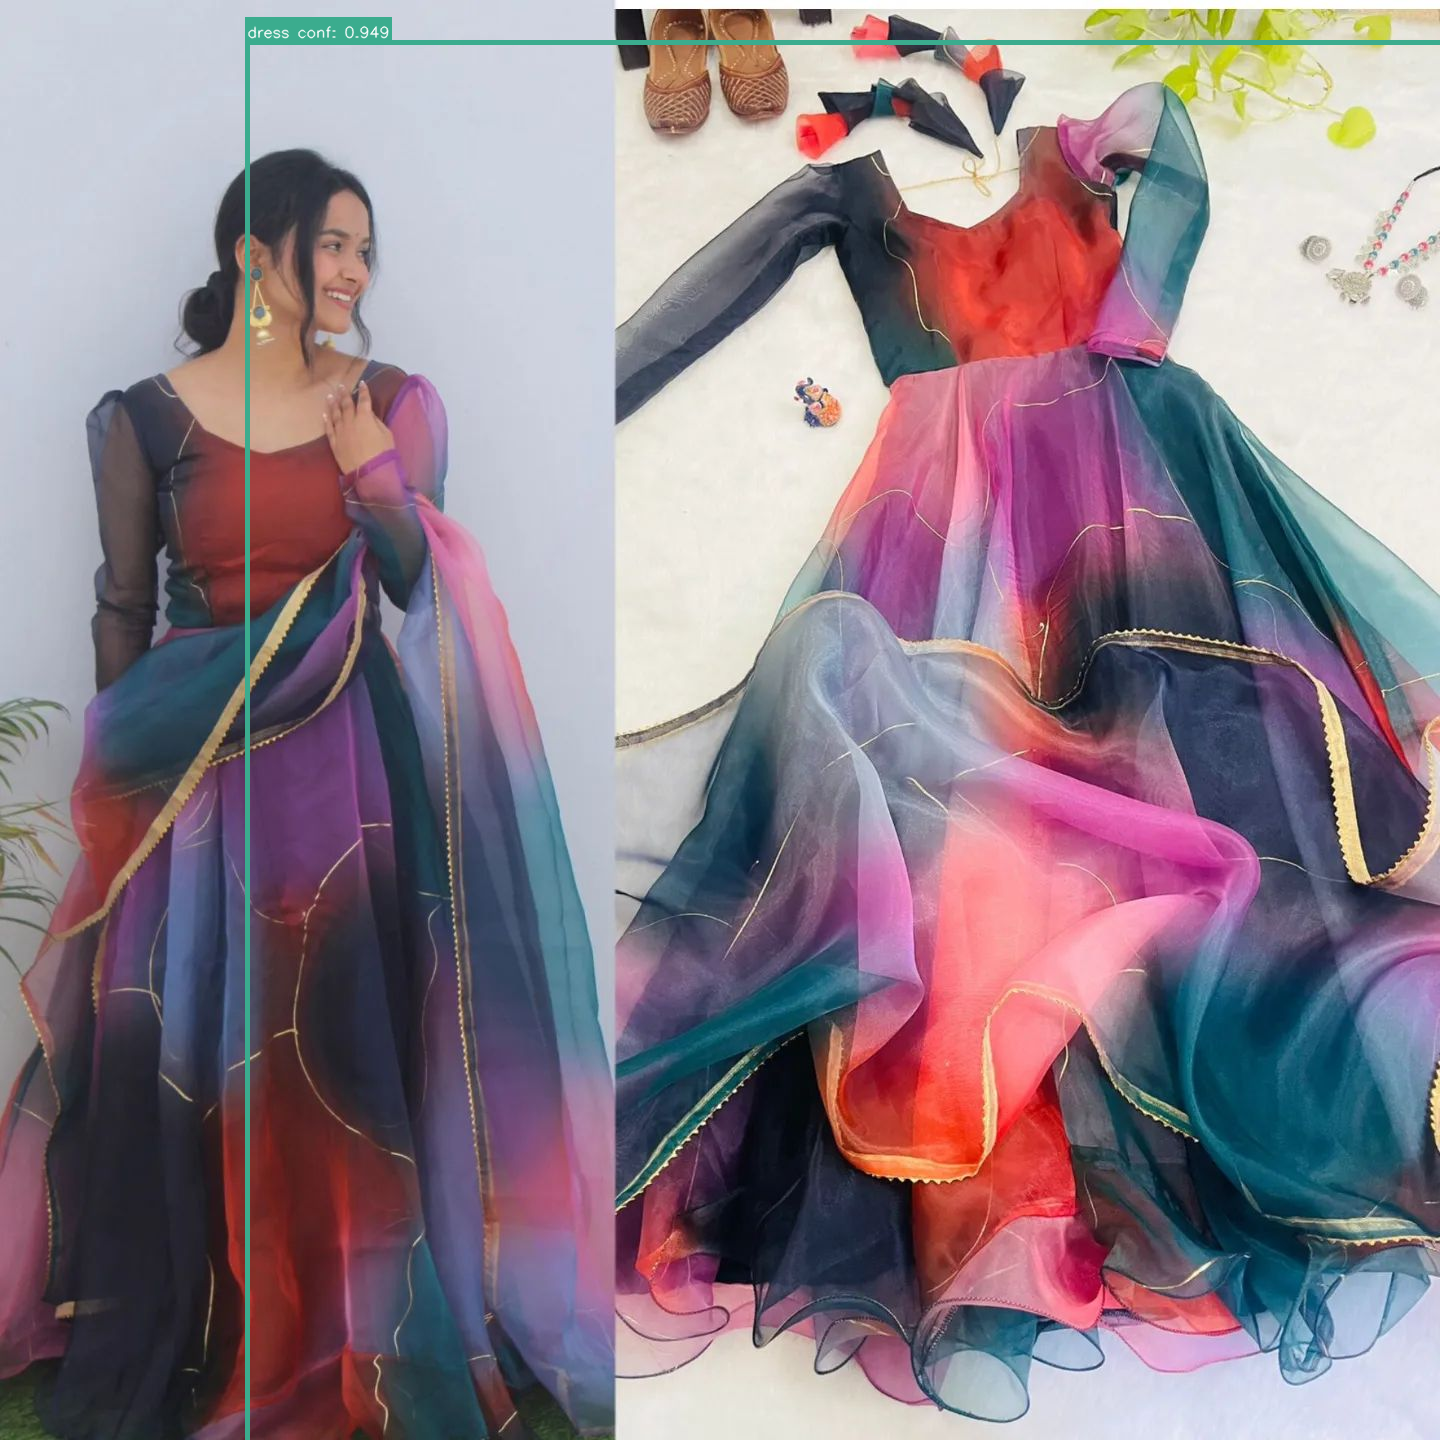

End inner loop
End of while loop


In [94]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
import torch
import os
import cv2
from yolo.utils.utils import *
from predictors.YOLOv3 import YOLOv3Predictor
import glob
from tqdm import tqdm
import sys
import uuid


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
print(device)

#YOLO PARAMS

yolo_modanet_params = {   "model_def" : "yolo/modanetcfg/yolov3-modanet.cfg",
# "weights_path" : "yolo/weights/yolov3-modanet_last.weights",
"weights_path" : "/content/MyDrive/MyDrive/Major project/3 Clothing_Detection_YOLOV3/yolo/weights/yolov3-modanet_last.weights",
"class_path":"yolo/modanetcfg/modanet.names",
"conf_thres" : 0.5,
"nms_thres" :0.4,
"img_size" : 416,
"device" : device}


#DATASET
dataset = 'modanet' #'df2' 

yolo_params = yolo_modanet_params


#Classes
classes = load_classes(yolo_params["class_path"])

#Colors
cmap = plt.get_cmap("rainbow")
colors = np.array([cmap(i) for i in np.linspace(0, 1, 13)])
#np.random.shuffle(colors)


model = 'yolo' 
detectron = YOLOv3Predictor(params=yolo_params)


while(True):
    path = input('img path: ')
    if not os.path.exists(path):
        print('Img does not exists..')
        continue
    img = cv2.imread(path)
    detections = detectron.get_detections(img)
    #detections = yolo.get_detections(img)
    #print(detections)
    
    if len(detections) != 0 :
        detections.sort(reverse=False ,key = lambda x:x[4])
        for x1, y1, x2, y2, cls_conf, cls_pred in detections:

                print("\t+ Label: %s, Conf: %.5f" % (classes[int(cls_pred)], cls_conf))           

                #color = bbox_colors[np.where(unique_labels == cls_pred)[0]][0]
                color = colors[int(cls_pred)]
                
                color = tuple(c*255 for c in color)
                color = (.7*color[2],.7*color[1],.7*color[0])       
                    
                font = cv2.FONT_HERSHEY_SIMPLEX   
            
            
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                text =  "%s conf: %.3f" % (classes[int(cls_pred)] ,cls_conf)
                
                cv2.rectangle(img,(x1,y1) , (x2,y2) , color,3)
                y1 = 0 if y1<0 else y1
                y1_rect = y1-25
                y1_text = y1-5

                if y1_rect<0:
                    y1_rect = y1+27
                    y1_text = y1+20
                cv2.rectangle(img,(x1-2,y1_rect) , (x1 + int(8.5*len(text)),y1) , color,-1)
                cv2.putText(img,text,(x1,y1_text), font, 0.5,(255,255,255),1,cv2.LINE_AA)
                
                          
    
    img_id = path.split('/')[-1].split('.')[0]
    cv2_imshow(img)
    print('End inner loop')
    break
print("End of while loop")